In [ ]:
#import the necesscary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
data=pd.read_csv("/content/cell2celltrain.csv")
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#this code turns the Yes and No into boolean data which can be proccessed
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
from sklearn import preprocessing
k=preprocessing.LabelEncoder()
k.fit(data['Churn'])
data['Churn']=k.transform(data['Churn'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
k=preprocessing.LabelEncoder()
k.fit(data['BuysViaMailOrder'])
data['BuysViaMailOrder']=k.transform(data['BuysViaMailOrder'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]

In [ ]:
#data validation
data.head()
data.info()

,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,DroppedCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,BuysViaMailOrder
0,1,24.00,22.0,0.25,0.0,0.0,0.7,0.0,97.2,0.0,0.0,61,1
1,1,16.99,17.0,0.00,0.0,0.0,0.3,0.0,0.0,0.0,0.0,58,1
2,0,38.00,38.0,0.00,0.0,0.0,0.0,0.0,0.4,0.3,0.0,60,0
3,0,82.28,75.0,1.24,0.0,0.0,52.0,1.3,200.3,370.3,147.0,59,1
4,1,17.14,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1


In [ ]:
#removes empty rows
data.dropna
print(data)

       Churn  MonthlyRevenue  TotalRecurringCharge  DirectorAssistedCalls  \
0          1           24.00                  22.0                   0.25   
1          1           16.99                  17.0                   0.00   
2          0           38.00                  38.0                   0.00   
3          0           82.28                  75.0                   1.24   
4          1           17.14                  17.0                   0.00   
...      ...             ...                   ...                    ...   
16013      0           29.00                  30.0                   0.00   
16014      0           50.97                  60.0                   0.50   
16015      1           79.88                  75.0                   1.73   
16016      1           63.74                  85.0                   0.00   
16017      0           36.31                  30.0                   0.00   

       OverageMinutes  RoamingCalls  DroppedCalls  ThreewayCalls  \
0      

In [ ]:
#standardises and normalises the data
scaler=StandardScaler()
data_scl=scaler.fit_transform(data)
norm=normalize(data_scl)
data_norm=pd.DataFrame(norm)

In [ ]:
#estimates the number of clusters used
est_bandwidth = estimate_bandwidth(data_norm,quantile=0.1,n_samples=10000)
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True).fit(data_norm)
labels_unique=np.unique(mean_shift.labels_)
n_clusters_=len(labels_unique)
print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 3


In [ ]:
#checks the silhouette and davies bouldin score for the estimated clusters
print('Silhouette Score for MeanShift:'+str(metrics.silhouette_score(data_norm,mean_shift.labels_,metric='euclidean').round(3)))
print('Davies Bouldin Score for MeanShift:'+str(metrics.davies_bouldin_score(data_norm,mean_shift.labels_).round(3)))

Silhouette Score for MeanShift:0.215
Davies Bouldin Score for MeanShift:1.682


In [ ]:
#uses pca to plot a graph
pca = PCA(n_components=3).fit_transform(data_norm)

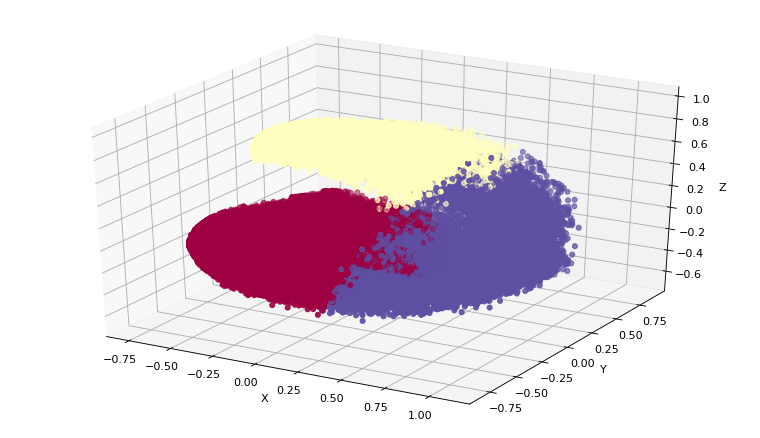

In [ ]:
#plot the results
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=mean_shift.labels_, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')


In [ ]:
#fits the data into pca
pca = PCA(n_components = 7)
pca.fit(data_norm)
scores_pca = pca.transform(data_norm)

In [ ]:
#segments the data with pca
data_segm_pca_meanshift = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_segm_pca_meanshift.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3','Comp 4','Comp 5','Comp 6','Comp 7']
data_segm_pca_meanshift['Segment K-means PCA'] = mean_shift.labels_

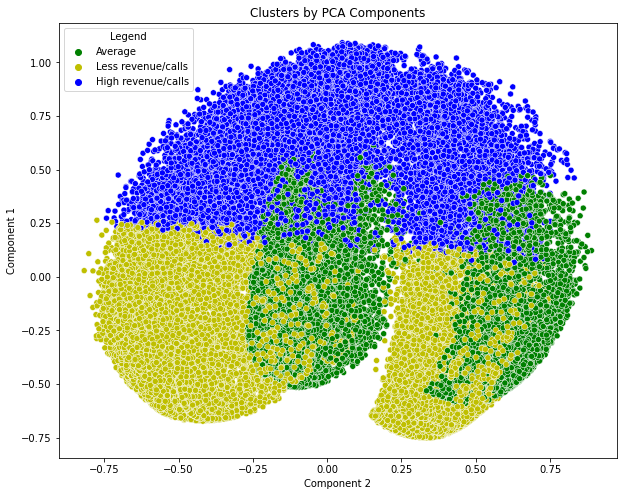

In [ ]:
#plots the results
data_segm_pca_meanshift['Legend'] = data_segm_pca_meanshift['Segment K-means PCA'].map({0:'Less revenue/calls', 
           1:'Average',
           2:'High revenue/calls', 
           3:'BuysViaMailorder,high'})
x_axis = data_segm_pca_meanshift['Component 2']
y_axis = data_segm_pca_meanshift['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_meanshift['Legend'], palette = ['g','y','b',])
plt.title('Clusters by PCA Components')
plt.show()